# Actividad 3.1

## Importamos Librerías

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmus as cs
import scipy.special as special
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

## 2. Cargamos el archivo de Ginebra en un DataFrame

In [51]:
df = cs.cargar_dataset('GINEBRA_NUMERICO.xlsx')
df.head()

,FUENTE INFO,NOMBRE ANFITRION,FECHA INICIO ANFITRION,TIEMPO DE RESPUESTA,SUPERANFITRION,TIPO DE PROPIEDAD,TIPO DE CUARTO,AMENIDADES,TIENE DISPONIBILIDAD,RESERVA INSTANTANEA,...,PUNTAJE PRECISION,PUNTAJE LIMPIEZA,PUNTAJE CHECKIN,PUNTAJE COMUNICACION,PUNTAJE UBICACION,PUNTAJE VALOR,ANUNCIOS ANFITRION,ANUNCIOS HOGAR COMPLETO,ANUNCIOS HABITACION PRIVADA,REVIEWS POR MES
0,city scrape,793,2010-07-30,2,1,2,2,"[""Hair dryer"", ""Bathtub"", ""Stove"", ""Dishes and...",1,1,...,4.73,4.78,4.86,4.84,4.85,4.55,1.0,0,1.0,0.49
1,city scrape,60,2011-08-21,1,2,1,1,"[""Hair dryer"", ""Lake access"", ""Private entranc...",1,2,...,4.98,4.89,4.97,4.99,4.96,4.81,2.0,2,0.0,0.60
2,city scrape,937,2011-11-25,1,2,1,1,"[""Hair dryer"", ""Long term stays allowed"", ""Hot...",1,1,...,4.70,4.74,4.88,4.89,4.77,4.68,1.0,1,0.0,0.78
3,city scrape,60,2011-08-21,1,2,1,1,"[""Hair dryer"", ""Dishes and silverware"", ""Kitch...",1,2,...,4.86,4.76,4.90,4.89,4.87,4.70,2.0,2,0.0,0.77
4,city scrape,237,2012-03-23,1,2,2,2,"[""Hair dryer"", ""Long term stays allowed"", ""Hot...",1,1,...,4.81,4.88,4.95,4.89,4.70,4.70,2.0,0,2.0,0.38


## 3. Realizamos las acciones de preprocesamiento necesarias: Nulos y Outliers

Nustra siguiente función primero sustituirá los valores nulos y luego hará el preprocesamiento para los outliers.

In [52]:
df = cs.sustituir_atipicos(df)

Nulos por columna: NOMBRE ANFITRION               0
TIEMPO DE RESPUESTA            0
TIPO DE PROPIEDAD              0
TIPO DE CUARTO                 0
ID ANUNCIIO                    0
TASA DE RESPUESTA              0
TASA DE ACEPTACION             0
CANTIDAD ANUNCIOS              0
CANTIDAD TOTAL ANUNCIOS        0
LATITUD                        0
LONGITUD                       0
CAPACIDAD                      0
BAÑOS                          0
CAMAS                          0
PRECIO                         0
NOCHES MINIMAS                 0
NOCHES MAXIMAS                 0
MINIMO NOCHES MINIMAS          0
MAXIMO NOCHES MINIMAS          0
MINIMO NOCHES MAXIMAS          0
MAXIMO NOCHES MAXIMAS          0
PROMEDIO NOCHES MINIMAS        0
PROMEDIO NOCHES MAXIMAS        0
DISPONIBILIDAD 30D             0
DISPONIBILIDAD 60D             0
DISPONIBILIDAD 90D             0
DISPONIBILIDAD 365D            0
CANTIDAD REVIEWS               0
REVIEWS ULTIMOS 12M            0
PUNTAJE RATING          

/Users/andrecalmus/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Tec/Universidad Tec/7° Semestre/Analítica de Datos y Herraminetas de Inteligencia Artificial/Prof. Alfredo/Parte 2/Actividades/Actividad 3.1/calmus.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualitativas = cualitativas_con_nulos.fillna(method='ffill')


Eliminamos de igual forma la columnas no numéricas irrelevantes para evitar problemas.

In [53]:
df = df.drop(columns=['FUENTE INFO', 'FECHA INICIO ANFITRION', 'AMENIDADES'])

## Modelos de Regresión No Lineal

### TASA DE RESPUESTA

<Axes: >

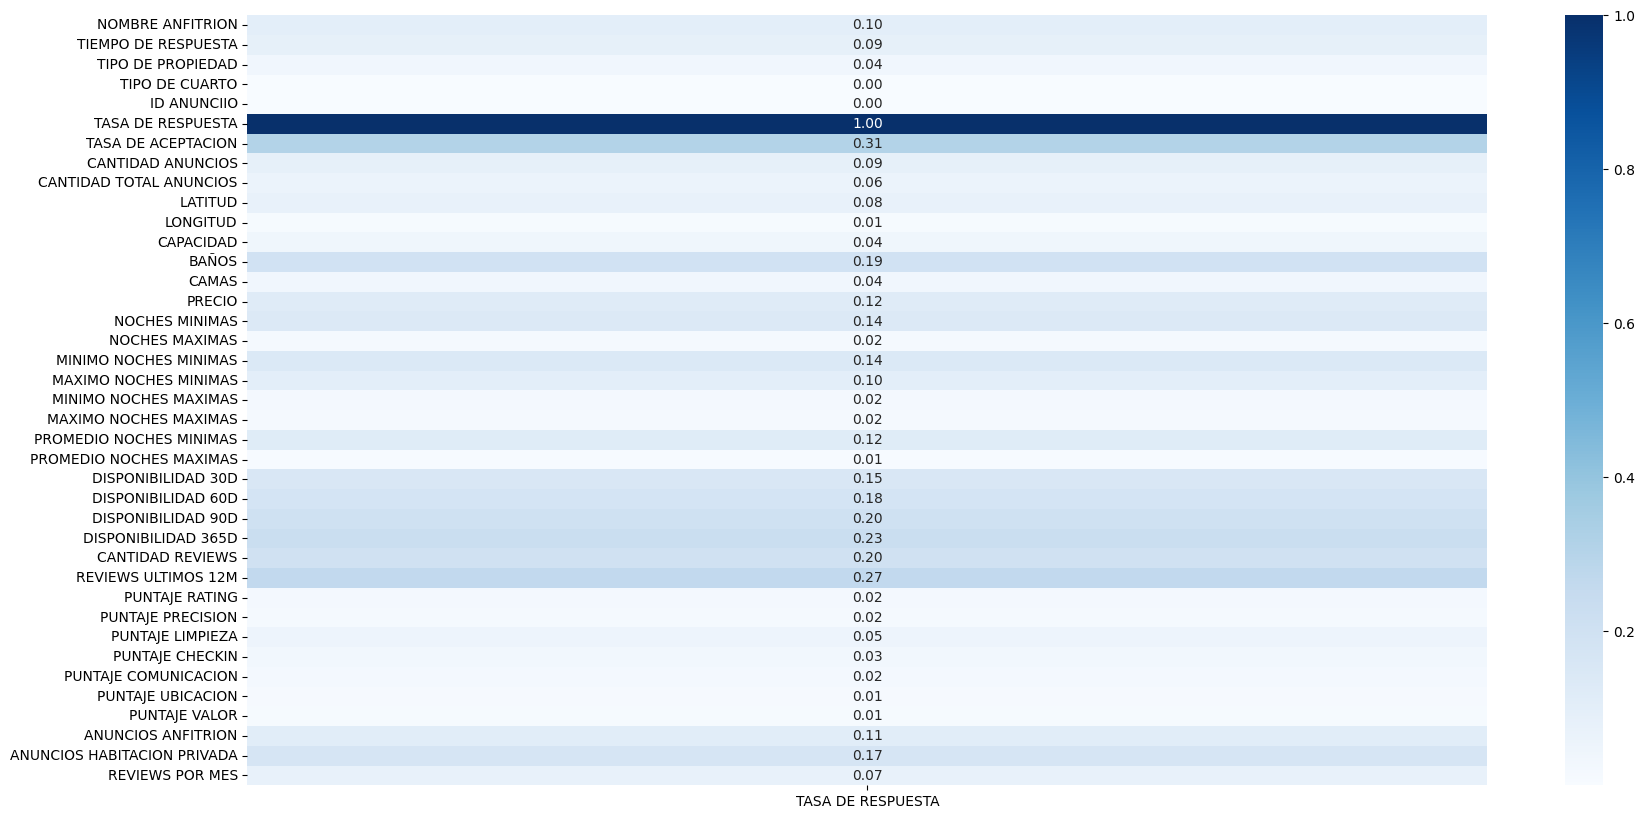

In [54]:
corr_Factors = df.corr()[['TASA DE RESPUESTA']]
corr_Factors = abs(corr_Factors)
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Blues', annot=True, fmt='.2f')
Heat_Map

In [62]:
#Debemos declarar la variable dependiente e independiente para los modelos
Vars_Indep= df[['TASA DE ACEPTACION']]
Var_Dep= df['TASA DE RESPUESTA']
#Redefinimos las variables a utilizar
x= Vars_Indep
y= Var_Dep

#### Modelo 1 Función Cuadrática

In [ ]:
def  func1 (x, a, b, c):
     return a * x**2 + b * x + c
#Ajustamos parámetros usando curve_fit
parametros1, covs= curve_fit(func1, df['TASA DE ACEPTACION'], df['TASA DE RESPUESTA'])
#Predicciones
y_pred1 = func1(x, *parametros1)
print('Parámetros Función Cuadrática', parametros1)
print('Predicciones Función Cuadrática:', y_pred1.head())

Parámetros Función Cuadrática [ 44.86725905 -55.75507813 109.29496375]
Predicciones Función Cuadrática:    TASA DE ACEPTACION
0           94.975700
1           98.407145
2           98.407145
3           98.407145
4           95.212300


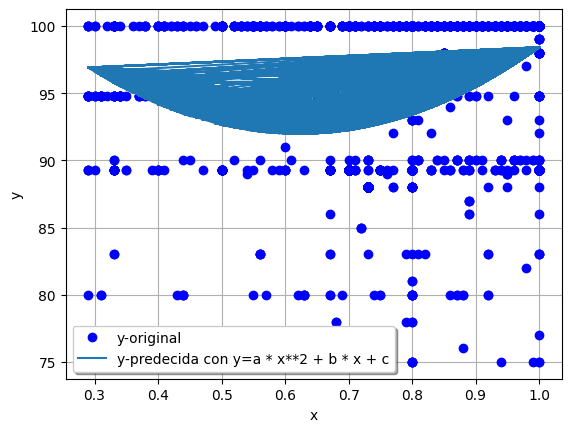

In [ ]:
#Graficamos los resultados para ver comparaciones
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a * x**2 + b * x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#Coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de Determinación: {R2_Modelo1}")
print(f"Coeficiente de Correlación: {R}")

Coeficiente de Determinación: 0.18911282258879258
Coeficiente de Correlación: 0.4348710413315568


#### Modelo 2 Función Exponencial

In [ ]:
def  func1 (x, a, b, c):
     return a * np.exp(-b * x) + c
#Ajustamos parámetros usando curve_fit
parametros1, covs= curve_fit(func1, df['TASA DE ACEPTACION'], df['TASA DE RESPUESTA'], maxfev=2000) #maxfev para quitar el error de que teniamos como maximo 800
#Predicciones
y_pred1 = func1(x, *parametros1)
print('Parámetros Función Exponencial:', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros Función Exponencial: [-1.78984810e+04  5.68616670e-04  1.79850946e+04]
Predicciones:    TASA DE ACEPTACION
0           95.567501
1           96.788134
2           96.788134
3           96.788134
4           95.669224


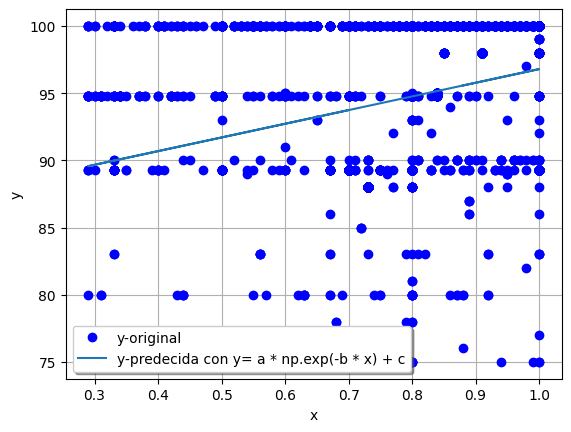

In [71]:
#Graficamos los resultados para ver comparaciones
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y= a * np.exp(-b * x) + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [72]:
#Coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#Coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de Determinación: {R2_Modelo1}")
print(f"Coeficiente de Correlación: {R}")

Coeficiente de Determinación: 0.09591391860453125
Coeficiente de Correlación: 0.30969972328778606


### TASA DE ACEPTACION

<Axes: >

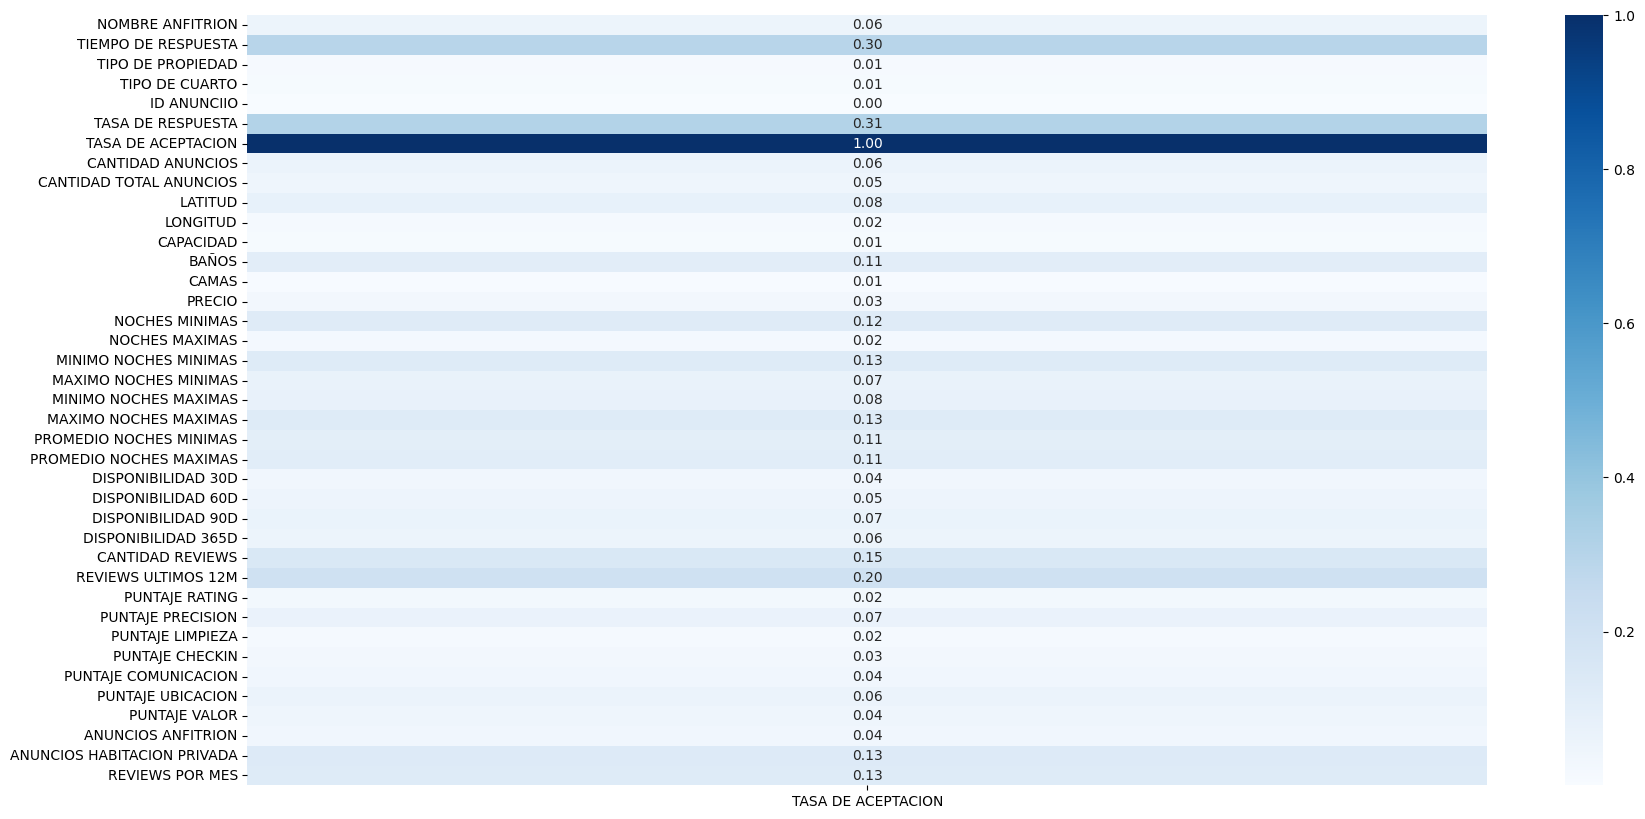

In [73]:
corr_Factors = df.corr()[['TASA DE ACEPTACION']]
corr_Factors = abs(corr_Factors)
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Blues', annot=True, fmt='.2f')
Heat_Map

In [74]:
#Debemos declarar la variable dependiente e independiente para los modelos
Vars_Indep= df[['TIEMPO DE RESPUESTA']]
Var_Dep= df['TASA DE ACEPTACION']
#Redefinimos las variables a utilizar
x= Vars_Indep
y= Var_Dep

#### Modelo 1 Función Tangencial

In [75]:
def  func1 (x, a, b, c):
     return a*np.tan(x) + b
parametros1, covs= curve_fit(func1, df['TIEMPO DE RESPUESTA'], df['TASA DE ACEPTACION'])
y_pred1 = func1(x, *parametros1)
print('Parámetros Función Tangencial:', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros Función Tangencial: [0.00362398 0.80850275 1.        ]
Predicciones:    TIEMPO DE RESPUESTA
0             0.800584
1             0.814147
2             0.814147
3             0.814147
4             0.814147


/var/folders/s0/gbwv5v5n6w195ppb5gfrlfcm0000gn/T/ipykernel_21211/1163892176.py:3: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros1, covs= curve_fit(func1, df['TIEMPO DE RESPUESTA'], df['TASA DE ACEPTACION'])


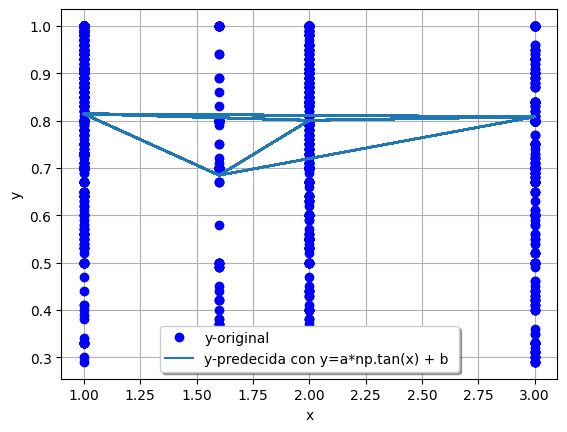

In [76]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*np.tan(x) + b ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [77]:
R2_Modelo1 = r2_score(y, y_pred1)
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de Determinación: {R2_Modelo1}")
print(f"Coeficiente de Correlación: {R}")

Coeficiente de Determinación: 0.034728496249110674
Coeficiente de Correlación: 0.18635583234530298


#### Modelo 1 Función Logarítmica

In [78]:
def  func1 (x, a, b):
     return a*np.log(x) + b
parametros1, covs= curve_fit(func1, df['TIEMPO DE RESPUESTA'], df['TASA DE ACEPTACION'])
y_pred1 = func1(x, *parametros1)
print('Parámetros Función Logarítmica:', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros Función Logarítmica: [-0.12626156  0.84518748]
Predicciones:    TIEMPO DE RESPUESTA
0             0.757670
1             0.845187
2             0.845187
3             0.845187
4             0.845187


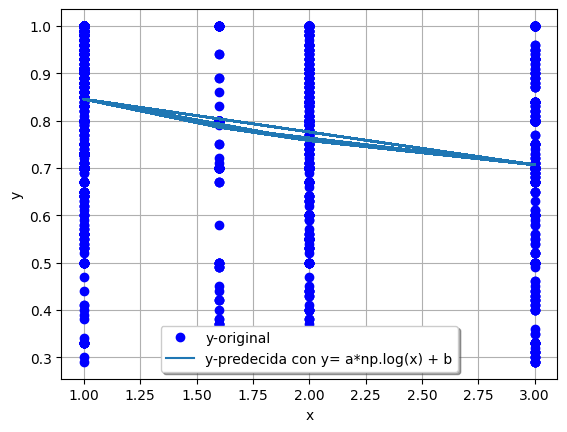

In [79]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y= a*np.log(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [80]:
R2_Modelo1 = r2_score(y, y_pred1)
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de Determinación: {R2_Modelo1}")
print(f"Coeficiente de Correlación: {R}")

Coeficiente de Determinación: 0.09647375660755875
Coeficiente de Correlación: 0.310602248233265


## CANTIDAD TOTAL ANUNCIOS

<Axes: >

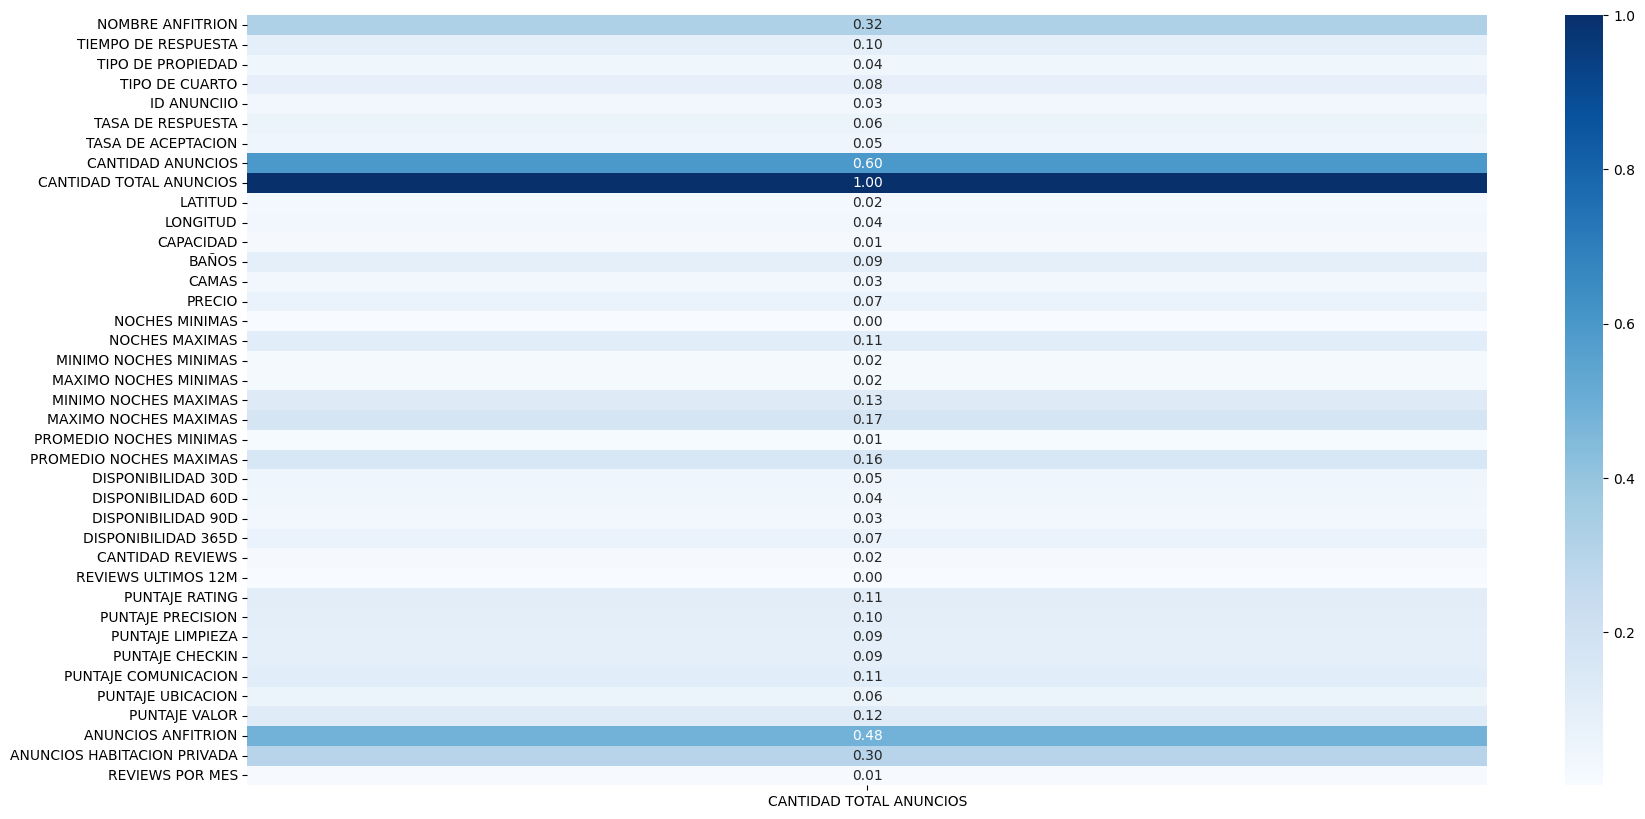

In [82]:
corr_Factors = df.corr()[['CANTIDAD TOTAL ANUNCIOS']]
corr_Factors = abs(corr_Factors)
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Blues', annot=True, fmt='.2f')
Heat_Map

In [83]:
#Debemos declarar la variable dependiente e independiente para los modelos
Vars_Indep= df[['CANTIDAD ANUNCIOS']]
Var_Dep= df['CANTIDAD TOTAL ANUNCIOS']
#Redefinimos las variables a utilizar
x= Vars_Indep
y= Var_Dep

#### Modelo 1 Función Cuadrática

In [84]:
def  func1 (x, a, b, c):
     return a * x**2 + b * x + c
parametros1, covs= curve_fit(func1, df['CANTIDAD ANUNCIOS'], df['CANTIDAD TOTAL ANUNCIOS'])
y_pred1 = func1(x, *parametros1)
print('Parámetros Función Cuadrática:', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros Función Cuadrática: [-0.53442881  2.90261154 -0.85713866]
Predicciones:    CANTIDAD ANUNCIOS
0           1.511044
1           2.418902
2           2.810369
3           2.418902
4           2.810369


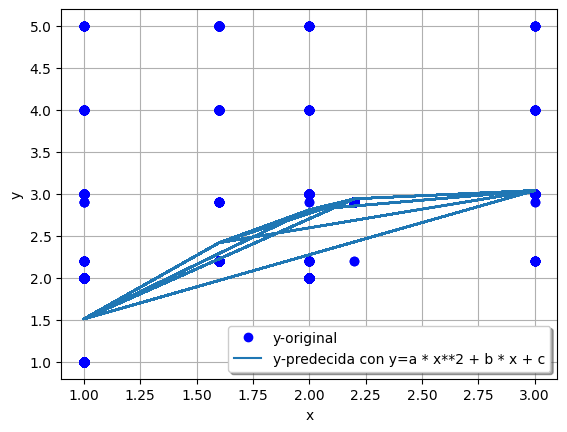

In [85]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a * x**2 + b * x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [86]:
R2_Modelo1 = r2_score(y, y_pred1)
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de Determinación: {R2_Modelo1}")
print(f"Coeficiente de Correlación: {R}")

Coeficiente de Determinación: 0.39070551605545634
Coeficiente de Correlación: 0.6250644095254955


#### Modelo 2 Función Senoidal

In [87]:
def  func1 (x, a, b):
     return a*np.sin(x) + b
parametros1, covs= curve_fit(func1, df['CANTIDAD ANUNCIOS'], df['CANTIDAD TOTAL ANUNCIOS'])
y_pred1 = func1(x, *parametros1)
print('Parámetros Función Senoidal', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros Función Senoidal [-0.7578173   2.82478805]
Predicciones:    CANTIDAD ANUNCIOS
0           2.187107
1           2.067294
2           2.135707
3           2.067294
4           2.135707


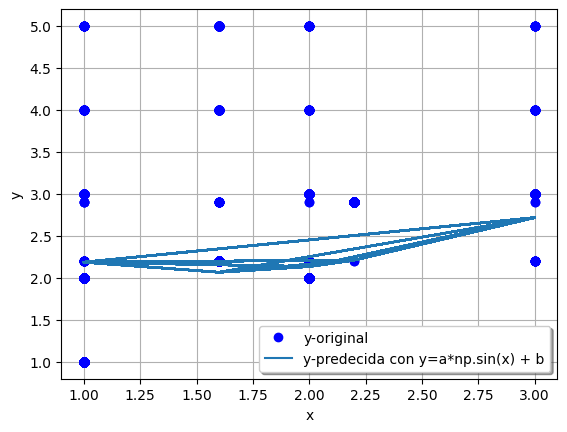

In [88]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*np.sin(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [89]:
R2_Modelo1 = r2_score(y, y_pred1)
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de Determinación: {R2_Modelo1}")
print(f"Coeficiente de Correlación: {R}")

Coeficiente de Determinación: 0.017096441081000502
Coeficiente de Correlación: 0.13075335973121494


## CAPACIDAD

<Axes: >

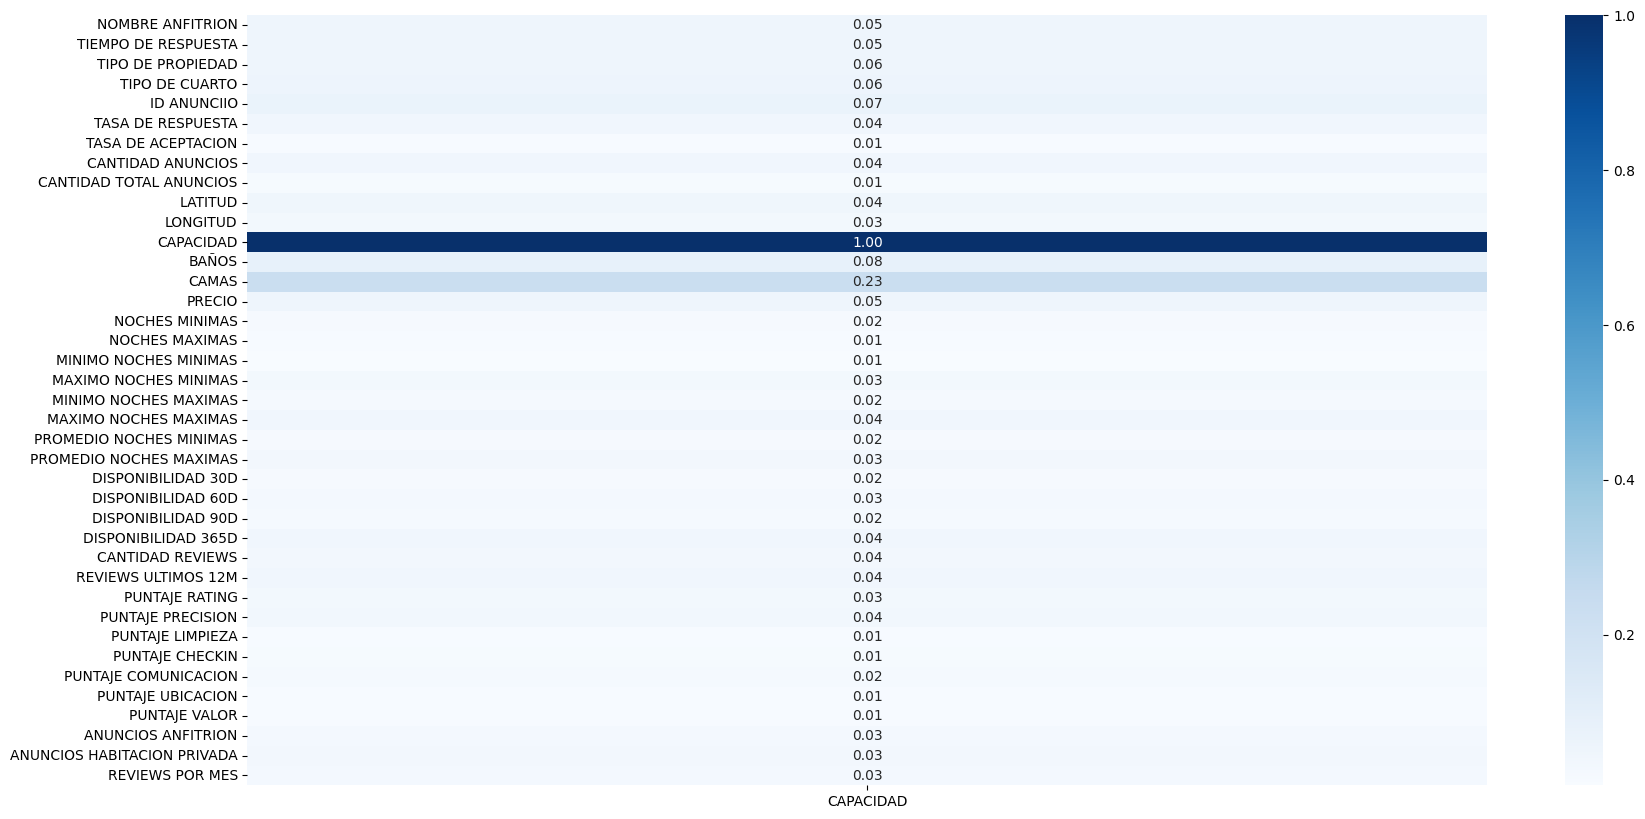

In [90]:
corr_Factors = df.corr()[['CAPACIDAD']]
corr_Factors = abs(corr_Factors)
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Blues', annot=True, fmt='.2f')
Heat_Map

In [91]:
#Debemos declarar la variable dependiente e independiente para los modelos
Vars_Indep= df[['CAMAS']]
Var_Dep= df['CAPACIDAD']
#Redefinimos las variables a utilizar
x= Vars_Indep
y= Var_Dep

#### Modelo 1 Función Cuadrática

In [92]:
def  func1 (x, a, b, c):
     return a * x**2 + b * x + c
parametros1, covs= curve_fit(func1, df['CAMAS'], df['CAPACIDAD'])
y_pred1 = func1(x, *parametros1)
print('Parámetros Función Cuadrática:', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros Función Cuadrática: [-0.90413578  3.33501689 -0.77716783]
Predicciones:       CAMAS
0  1.653713
1  2.119750
2  2.119750
3  1.653713
4  1.653713


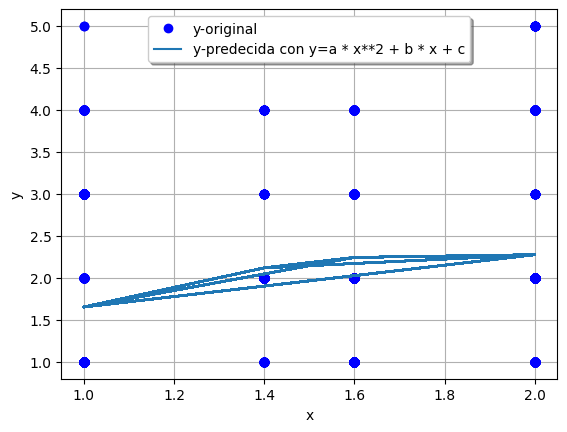

In [93]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a * x**2 + b * x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [94]:
R2_Modelo1 = r2_score(y, y_pred1)
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de Determinación: {R2_Modelo1}")
print(f"Coeficiente de Correlación: {R}")

Coeficiente de Determinación: 0.06131809590399362
Coeficiente de Correlación: 0.2476249097001221


#### Función Valor Absoluto

In [95]:
def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c
parametros1, covs= curve_fit(func1, df['CAMAS'], df['CAPACIDAD'])
y_pred1 = func1(x, *parametros1)
print('Parámetros Función de Valor Absoluto:', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros Función de Valor Absoluto: [ 112.283009   -111.55673488    0.97171755]
Predicciones:       CAMAS
0  1.697992
1  1.988501
2  1.988501
3  1.697992
4  1.697992


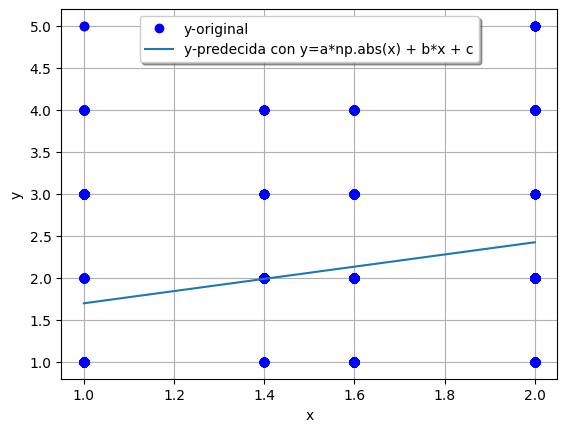

In [96]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*np.abs(x) + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [97]:
R2_Modelo1 = r2_score(y, y_pred1)
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de Determinación: {R2_Modelo1}")
print(f"Coeficiente de Correlación: {R}")

Coeficiente de Determinación: 0.054290257731515634
Coeficiente de Correlación: 0.2330026989790368


## REVIEWS POR MES

<Axes: >

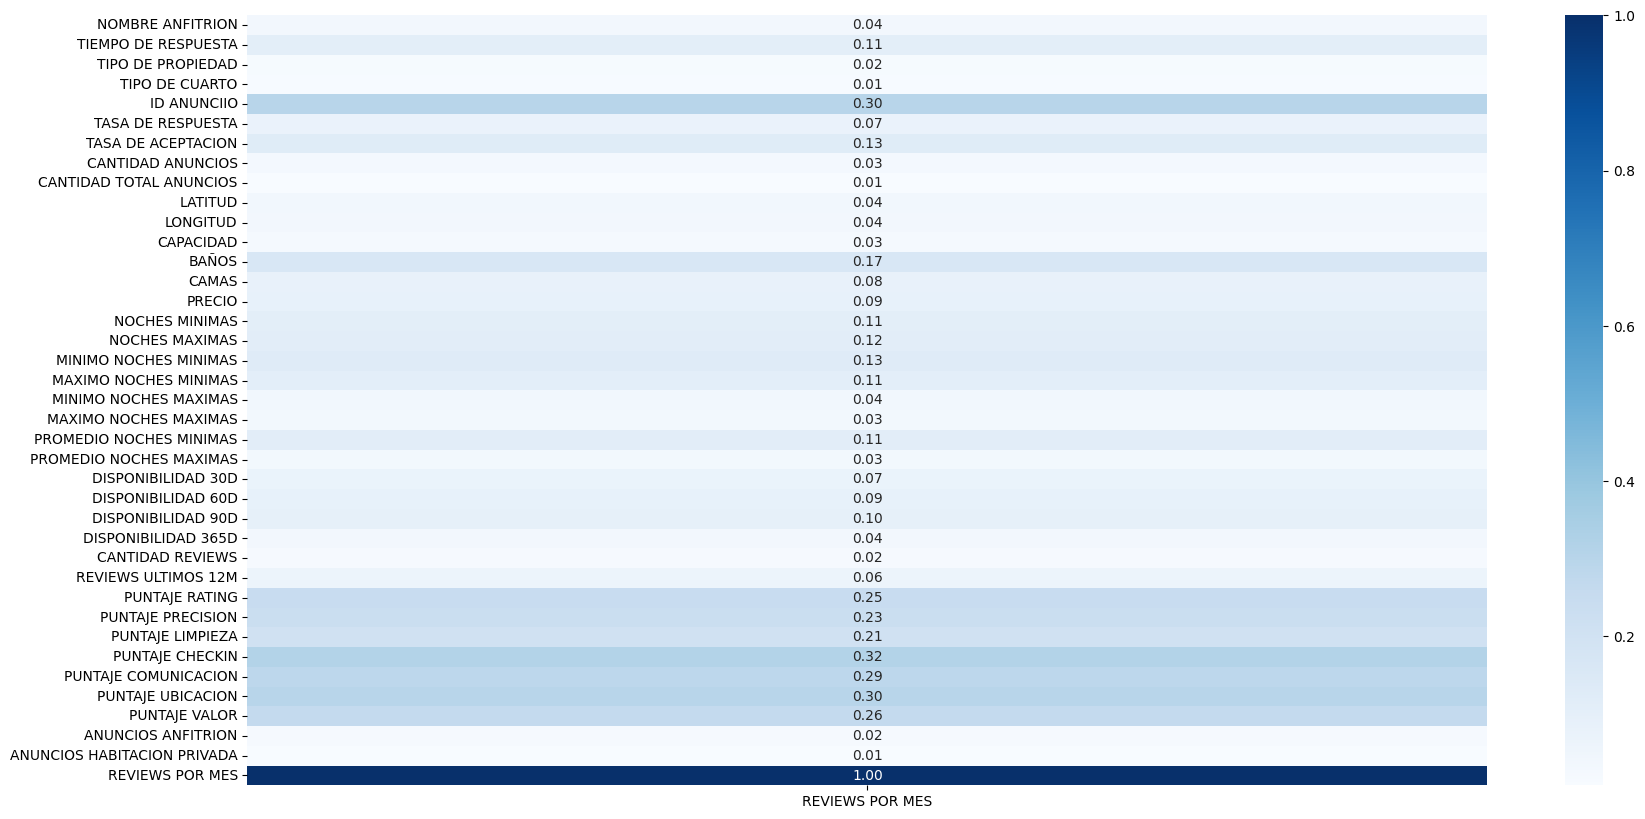

In [98]:
corr_Factors = df.corr()[['REVIEWS POR MES']]
corr_Factors = abs(corr_Factors)
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Blues', annot=True, fmt='.2f')
Heat_Map

In [99]:
#Debemos declarar la variable dependiente e independiente para los modelos
Vars_Indep= df[['PUNTAJE CHECKIN']]
Var_Dep= df['REVIEWS POR MES']
#Redefinimos las variables a utilizar
x= Vars_Indep
y= Var_Dep

#### Modelo 1 Función Cuadrática

In [100]:
def  func1 (x, a, b, c):
     return a * x**2 + b * x + c
parametros1, covs= curve_fit(func1, df['PUNTAJE CHECKIN'], df['REVIEWS POR MES'])
y_pred1 = func1(x, *parametros1)
print('Parámetros Función Cuadrática:', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros Función Cuadrática: [  -7.90674955   75.31713392 -178.48589481]
Predicciones:    PUNTAJE CHECKIN
0         0.801114
1         0.536431
2         0.767222
3         0.727005
4         0.598787


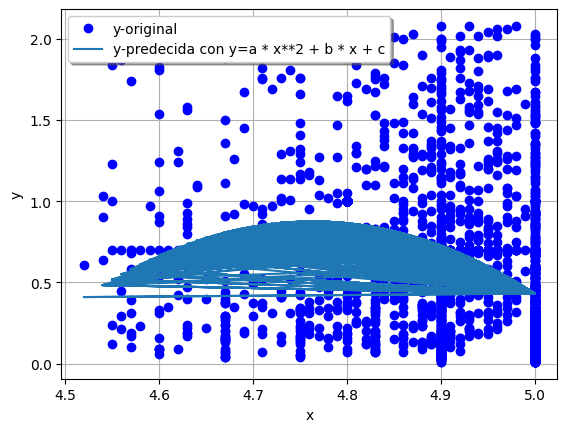

In [101]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a * x**2 + b * x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [102]:
R2_Modelo1 = r2_score(y, y_pred1)
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de Determinación: {R2_Modelo1}")
print(f"Coeficiente de Correlación: {R}")

Coeficiente de Determinación: 0.15739776337487577
Coeficiente de Correlación: 0.3967338697097536


#### Modelo 2 Función Exponencial 

In [ ]:
def  func1 (x, a, b, c):
     return  a*np.exp(-b*x) + c
parametros1, covs= curve_fit(func1, df['PUNTAJE CHECKIN'], df['REVIEWS POR MES'], maxfev=5000) #maxfev para quitar el error de que teniamos como maximo 2000
y_pred1 = func1(x, *parametros1)
print('Parámetros Función Exponencial:', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros Función Exponencial: [ 1.18519423e+03  1.15239175e-03 -1.17786731e+03]
Predicciones:    PUNTAJE CHECKIN
0         0.707640
1         0.558250
2         0.680477
3         0.653314
4         0.585410


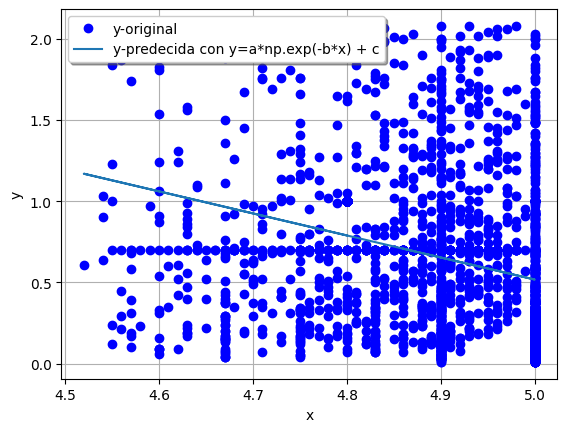

In [106]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*np.exp(-b*x) + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [107]:
R2_Modelo1 = r2_score(y, y_pred1)
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de Determinación: {R2_Modelo1}")
print(f"Coeficiente de Correlación: {R}")

Coeficiente de Determinación: 0.09991626546310206
Coeficiente de Correlación: 0.3160953423622405


## PRECIO

<Axes: >

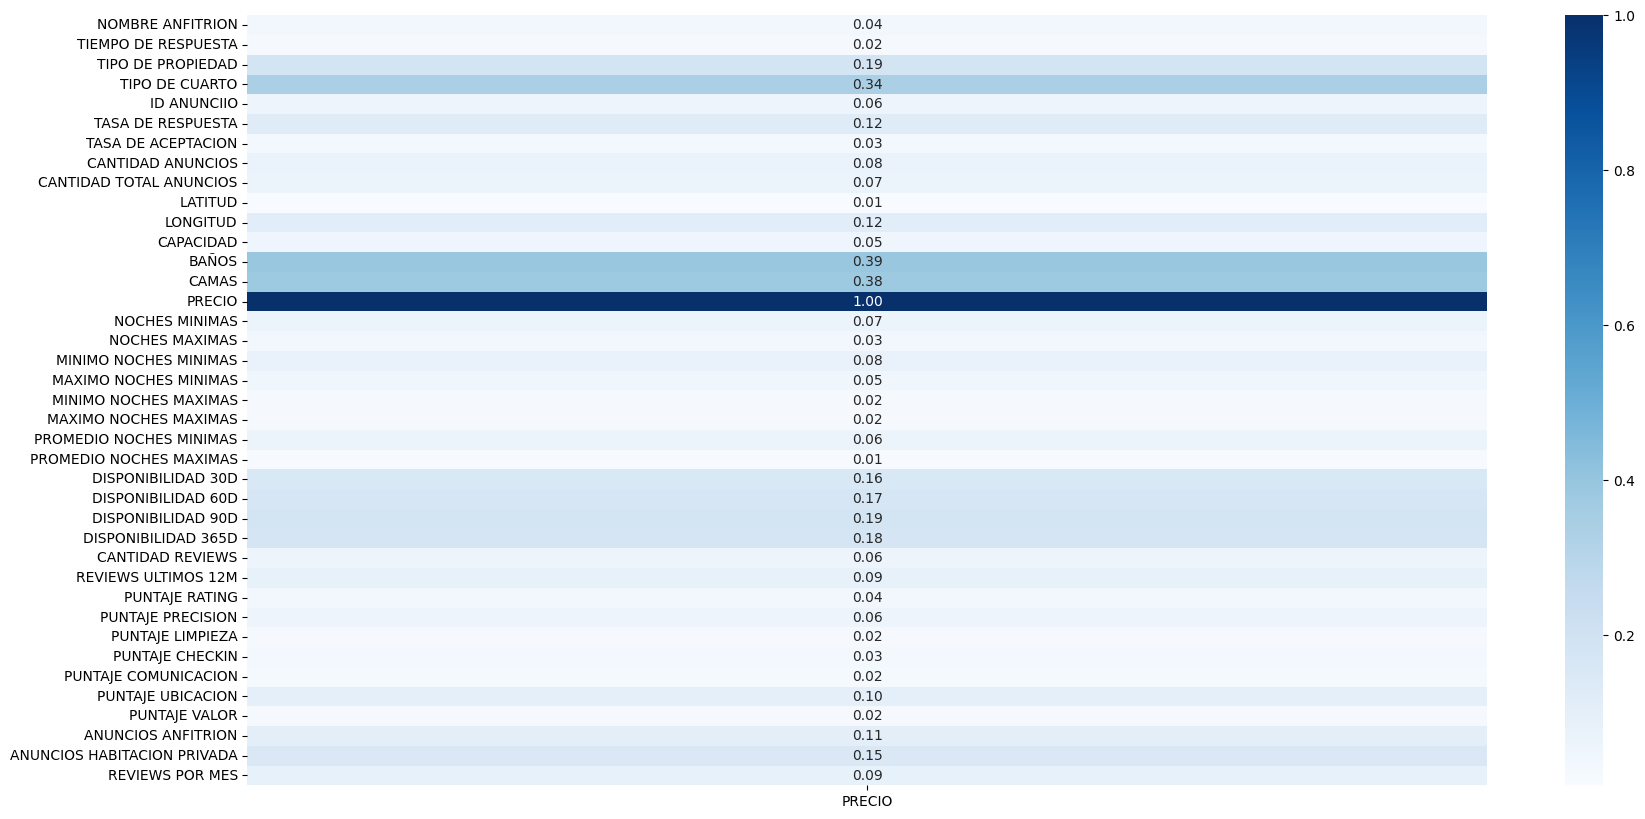

In [108]:
corr_Factors = df.corr()[['PRECIO']]
corr_Factors = abs(corr_Factors)
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Blues', annot=True, fmt='.2f')
Heat_Map

In [109]:
#Debemos declarar la variable dependiente e independiente para los modelos
Vars_Indep= df[['BAÑOS']]
Var_Dep= df['PRECIO']
#Redefinimos las variables a utilizar
x= Vars_Indep
y= Var_Dep

#### Modelo 1 Función Cuadrática

In [110]:
def  func1 (x, a, b, c):
     return a * x**2 + b * x + c
parametros1, covs= curve_fit(func1, df['BAÑOS'], df['PRECIO'])
y_pred1 = func1(x, *parametros1)
print('Parámetros Función Cuadrática:', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros Función Cuadrática: [ 1124.87604479 -2280.3144957   1270.22719469]
Predicciones:         BAÑOS
0  122.981264
1  114.788744
2  114.788744
3  122.981264
4  114.788744


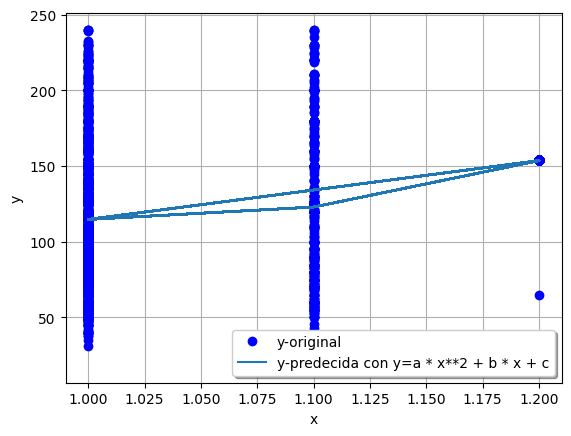

In [111]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a * x**2 + b * x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [112]:
R2_Modelo1 = r2_score(y, y_pred1)
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de Determinación: {R2_Modelo1}")
print(f"Coeficiente de Correlación: {R}")

Coeficiente de Determinación: 0.16312186547554985
Coeficiente de Correlación: 0.4038834800725945


#### Modelo 2 Función Tangencial

In [113]:
def  func1 (x, a, b, c):
     return a*np.tan(x) + b
parametros1, covs= curve_fit(func1, df['BAÑOS'], df['PRECIO'])
y_pred1 = func1(x, *parametros1)
print('Parámetros Función Tangencial:', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros Función Tangencial: [37.73641677 54.97007933  1.        ]
Predicciones:         BAÑOS
0  129.113069
1  113.741066
2  113.741066
3  129.113069
4  113.741066


/var/folders/s0/gbwv5v5n6w195ppb5gfrlfcm0000gn/T/ipykernel_21211/4098699002.py:3: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros1, covs= curve_fit(func1, df['BAÑOS'], df['PRECIO'])


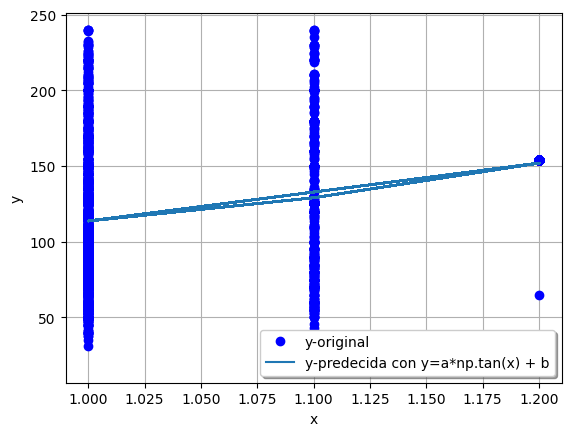

In [114]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*np.tan(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [115]:
R2_Modelo1 = r2_score(y, y_pred1)
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de Determinación: {R2_Modelo1}")
print(f"Coeficiente de Correlación: {R}")

Coeficiente de Determinación: 0.15848686222498132
Coeficiente de Correlación: 0.398104084662518


## 5. Realizamos una tabla de todos los coeficientes de determinación y correlación obtenidos para cada correlación analizada, según sea el caso.

In [119]:
# Crear una lista con los datos de los coeficientes
data = {
    'Variable Dependiente': ['TASA DE RESPUESTA','TASA DE RESPUESTA', 'TASA DE ACEPTACION', 'TASA DE ACEPTACION', 'CANTIDAD TOTAL ANUNCIOS', 'CANTIDAD TOTAL ANUNCIOS', 'CAPACIDAD', 'CAPACIDAD', 'REVIEWS POR MES', 'REVIEWS POR MES', 'PRECIO', 'PRECIO'],
    'Variable Independiente': ['TASA DE ACEPTACION', 'TASA DE ACEPTACION', 'TIEMPO DE RESPUESTA', 'TIEMPO DE RESPUESTA', 'CANTIDAD ANUNCIOS', 'CANTIDAD ANUNCIOS', 'CAMAS', 'CAMAS', 'PUNTAJE CHECKIN', 'PUNTAJE CHECKIN', 'BAÑOS', 'BAÑOS'],
    'Modelo': ['Cuadrática', 'Exponencial', 'Tangencial', 'Logarítmica', 'Cuadrática', 'Senoidal', 'Cuadrática', 'Valor Absoluto', 'Cuadrática', 'Exponencial', 'Cuadrática', 'Tangencial'],
    'Coeficiente de Determinación (R²)': [0.18911282258879258, 0.09591391860453125, 0.034728496249110674, 0.09647375660755875, 0.39070551605545634, 0.017096441081000502, 0.06131809590399362, 0.054290257731515634, 0.15739776337487577, 0.09991626546310206, 0.16312186547554985, 0.15848686222498132],
    'Coeficiente de Correlación (R)': [0.4348710413315568, 0.30969972328778606, 0.18635583234530298, 0.310602248233265, 0.6250644095254955, 0.13075335973121494, 0.2476249097001221, 0.2330026989790368, 0.3967338697097536, 0.3160953423622405, 0.4038834800725945, 0.398104084662518]
}

# Crear el DataFrame
tabla_coeficientes = pd.DataFrame(data)

# Mostrar la tabla
tabla_coeficientes

,Variable Dependiente,Variable Independiente,Modelo,Coeficiente de Determinación (R²),Coeficiente de Correlación (R)
0,TASA DE RESPUESTA,TASA DE ACEPTACION,Cuadrática,0.189113,0.434871
1,TASA DE RESPUESTA,TASA DE ACEPTACION,Exponencial,0.095914,0.309700
2,TASA DE ACEPTACION,TIEMPO DE RESPUESTA,Tangencial,0.034728,0.186356
3,TASA DE ACEPTACION,TIEMPO DE RESPUESTA,Logarítmica,0.096474,0.310602
4,CANTIDAD TOTAL ANUNCIOS,CANTIDAD ANUNCIOS,Cuadrática,0.390706,0.625064
5,CANTIDAD TOTAL ANUNCIOS,CANTIDAD ANUNCIOS,Senoidal,0.017096,0.130753
6,CAPACIDAD,CAMAS,Cuadrática,0.061318,0.247625
7,CAPACIDAD,CAMAS,Valor Absoluto,0.054290,0.233003
8,REVIEWS POR MES,PUNTAJE CHECKIN,Cuadrática,0.157398,0.396734
9,REVIEWS POR MES,PUNTAJE CHECKIN,Exponencial,0.099916,0.316095
